# Disaster Tweets Classification Using Natural Language Processing (NLP)
Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster.

This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’ website here.

Tweet source: https://twitter.com/AnyOtherAnnaK/status/629195955506708480

Competition link : https://www.kaggle.com/c/nlp-getting-started/overview

## Problem Statement:
To classify tweets whether they indicate a disaster or not. - Binary Classification

## Project Planning
1. Import Libraries
2. Load Data

## Importing Libraries

In [2]:
#!pip install catboost

In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 150)

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams
import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

plt.rcParams.update({'font.size': 12})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PraveenSamudrala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PraveenSamudrala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Data

In [3]:
# Load data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
sub_sample = pd.read_csv("sample_submission.csv")

In [5]:
print('df_train data shape: ',df_train.shape)
print('df_test data shape: ',df_test.shape)

df_train data shape:  (7613, 5)
df_test data shape:  (3263, 4)


In [6]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [7]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Exploratory Data Analysis

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
print('Null values from df_train data')
null_df_train = df_train.isnull().sum(axis=0)
print(null_df_train)

print('\n\nNull values from df_test data')
null_df_test = df_test.isnull().sum(axis=0)
print(null_df_test)

Null values from df_train data
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


Null values from df_test data
id             0
keyword       26
location    1105
text           0
dtype: int64


<Axes: >

<Axes: >

Text(0, 0.5, 'Value Percentage')

Text(0.5, 1.0, 'Train Set')

Text(0.5, 1.0, 'Test Set')

Text(0.0, 0.0, '0.00')

Text(1.0, 0.008012610009194798, '0.01')

Text(2.0, 0.33272034677525286, '0.33')

Text(3.0, 0.0, '0.00')

Text(4.0, 0.0, '0.00')

Text(0.0, 0.0, '0.00')

Text(1.0, 0.00796812749003984, '0.01')

Text(2.0, 0.3386454183266932, '0.34')

Text(3.0, 0.0, '0.00')

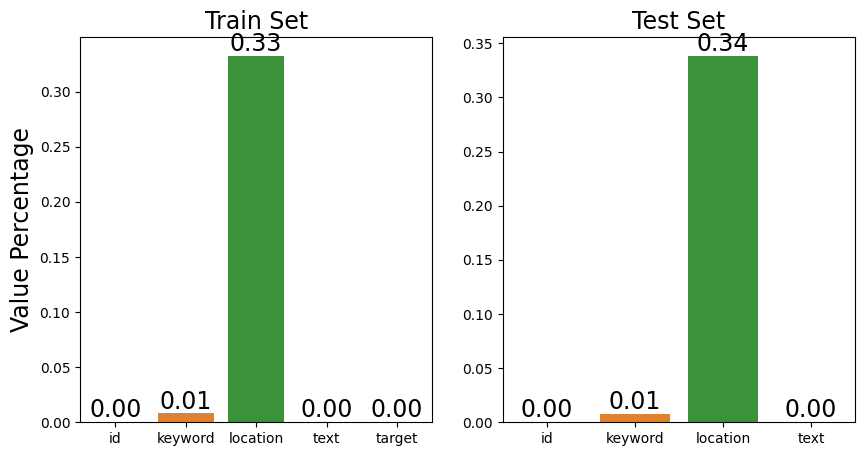

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.barplot(x = null_df_train.index, y = null_df_train.values/df_train.shape[0], ax=ax[0])
sns.barplot(x = null_df_test.index, y = null_df_test.values/df_test.shape[0], ax=ax[1])

ax[0].set_ylabel('Value Percentage', size=17)
ax[0].set_title('Train Set', fontsize=17)
ax[1].set_title('Test Set', fontsize=17)

for ax in ax:
  ax.tick_params(labelsize=10)
  for p in ax.patches:
      ax.annotate('{:.2f}'.format(p.get_height()),
                  (p.get_x() + 0.4, p.get_height()),
                  ha='center', va='bottom', color='black', size=17)
plt.show()

Very similar null value distribution of Train and Test data. It might indicate Train and test data are good samples from the population.

Null values in 'Keyword' column is imputed with 'None' value first. As keyword is an important feature for summarizing the disaster, it can be filled with a word from tweet text. This treatment can be done during Preprocessing.  
Need to explore 'location' field to impute null values.

Lets explore the 'keyword' column 

target
0    0.57034
1    0.42966
Name: id, dtype: float64


<Figure size 500x500 with 0 Axes>

<Axes: title={'center': 'Target distribution in df_training Set'}>

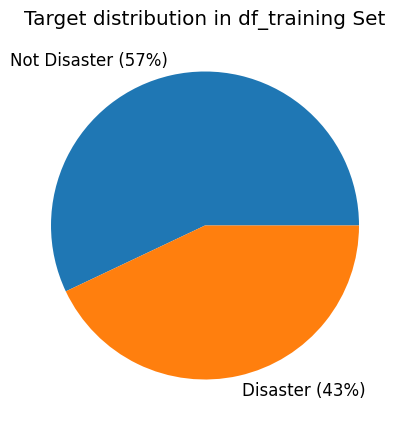

In [11]:
# Proportion of Target Classes
class_count = df_train.groupby('target').count()['id']/df_train.shape[0]
print(class_count)

plt.figure(figsize = (5,5))
df_train.groupby('target').count()['id'].plot(kind='pie', 
                                          labels=['Not Disaster (57%)', 'Disaster (43%)'],
                                          title='Target distribution in df_training Set',
                                          ylabel='')

In [12]:
df_train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [13]:
df_train_temp = df_train['keyword'].value_counts()
df_train_temp[df_train_temp.values < 30]

annihilation             29
bombing                  29
obliteration             29
sirens                   29
snowstorm                29
desolate                 29
seismic                  29
first%20responders       29
rubble                   28
demolished               28
deluged                  27
volcano                  27
battle                   26
bush%20fires             25
war%20zone               24
rescue                   22
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, dtype: int64

There is a '%20' character in the text, this needs to treated with space.

### Treating 'keyword' column

In [14]:
# Fill missing values with 'None'
df_train['keyword'] = df_train['keyword'].fillna(f'None')
df_test['keyword'] = df_test['keyword'].fillna(f'None')

# fix '20%' typo in 'keyword' column
df_train['keyword'] = df_train['keyword'].apply(lambda x: re.sub('%20', ' ', x))
df_test['keyword'] = df_test['keyword'].apply(lambda x: re.sub('%20', ' ', x))

In [15]:
# Filling 'None' values in 'keyword' column with a word from 'keyword' column values, which is present in that text.
# For each row with 'keyword' = None
#   Check corresponding 'text' for an existing 'keyword' value
#       If found, replace 'None' with that 'keyword' value
no_keyword = df_train['keyword'] == 'None'
keywords = np.unique(df_train[~no_keyword]['keyword'].to_numpy())

for df in [df_train, df_test]:
    for i in range(len(df)):
        if df.loc[i, 'keyword'] == 'None':
            for k in keywords:
                if k in df.loc[i, 'text'].lower():
                    df.loc[i, 'keyword'] = k
                    break

In [16]:
print('Number of missing values left:')
print('For Train set:', df_train[df_train['keyword'] == 'None'].shape[0])
print('For Test set:', df_test[df_test['keyword'] == 'None'].shape[0])

pd.concat([df_train[df_train['keyword'] == 'None']['text'], df_test[df_test['keyword'] == 'None']['text']])

Number of missing values left:
For Train set: 16
For Test set: 9


15                                                              What's up man?
16                                                               I love fruits
17                                                            Summer is lovely
18                                                           My car is so fast
19                                                What a goooooooaaaaaal!!!!!!
20                                                      this is ridiculous....
21                                                           London is cool ;)
22                                                                 Love skiing
23                                                       What a wonderful day!
24                                                                    LOOOOOOL
25                                              No way...I can't eat that shit
26                                                       Was in NYC last week!
27                                                  

These are the final 'text' columns values having 'None' value for 'keyword' column. They don't have any significant keyword, so left as they are, these rows have 'keyword'= None

In [17]:
# Fill missing values with 'None'
df_train['location'] = df_train['location'].fillna(f'None')
df_test['location'] = df_test['location'].fillna(f'None')

In [18]:
df_train.isna().sum()
df_test.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

id          0
keyword     0
location    0
text        0
dtype: int64

Text(0.5, 1.0, 'Top keywords for disaster tweets')

Text(0.5, 0, 'Count')

<Axes: title={'center': 'Top keywords for disaster tweets'}, xlabel='keyword'>

Text(0.5, 1.0, 'Top keywords for non-disaster tweets')

Text(0.5, 0, 'Count')

<Axes: title={'center': 'Top keywords for non-disaster tweets'}, xlabel='keyword'>

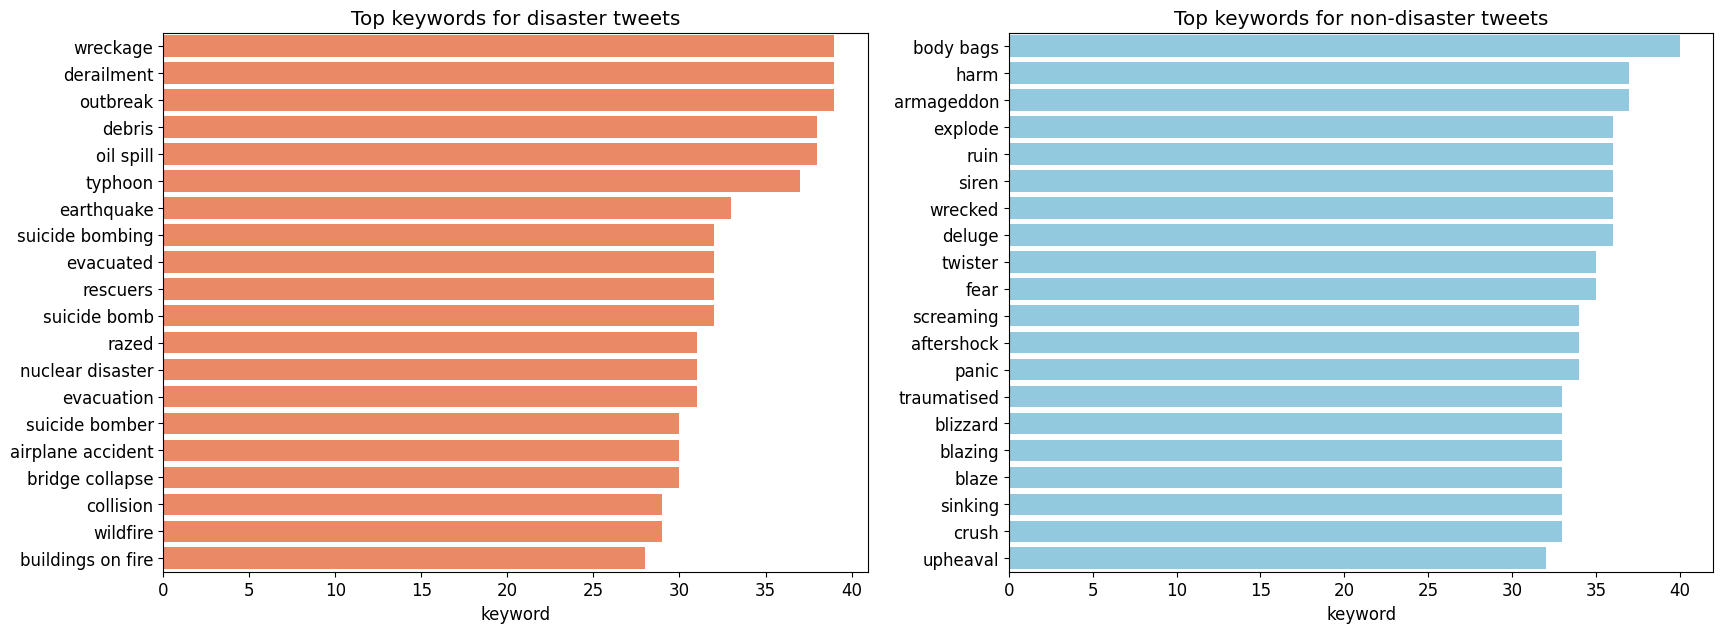

In [19]:
# Top 20 keywords for each class

disaster = df_train[df_train['target']==1]['keyword'].value_counts().head(20)
non_disaster = df_train[df_train['target']==0]['keyword'].value_counts().head(20)

fig, ax = plt.subplots(1,2, figsize=(20,7))

ax[0].set_title('Top keywords for disaster tweets')
ax[0].set_xlabel('Count')
sns.barplot(x = disaster, y = disaster.index, color='coral', ax=ax[0],  )

ax[1].set_title('Top keywords for non-disaster tweets')
ax[1].set_xlabel('Count')
sns.barplot(x = non_disaster, y = non_disaster.index, color='skyblue',  ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Length of Disastrous Tweets')

<Axes: title={'center': 'Length of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Length of Non-Disastrous Tweets')

<Axes: title={'center': 'Length of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

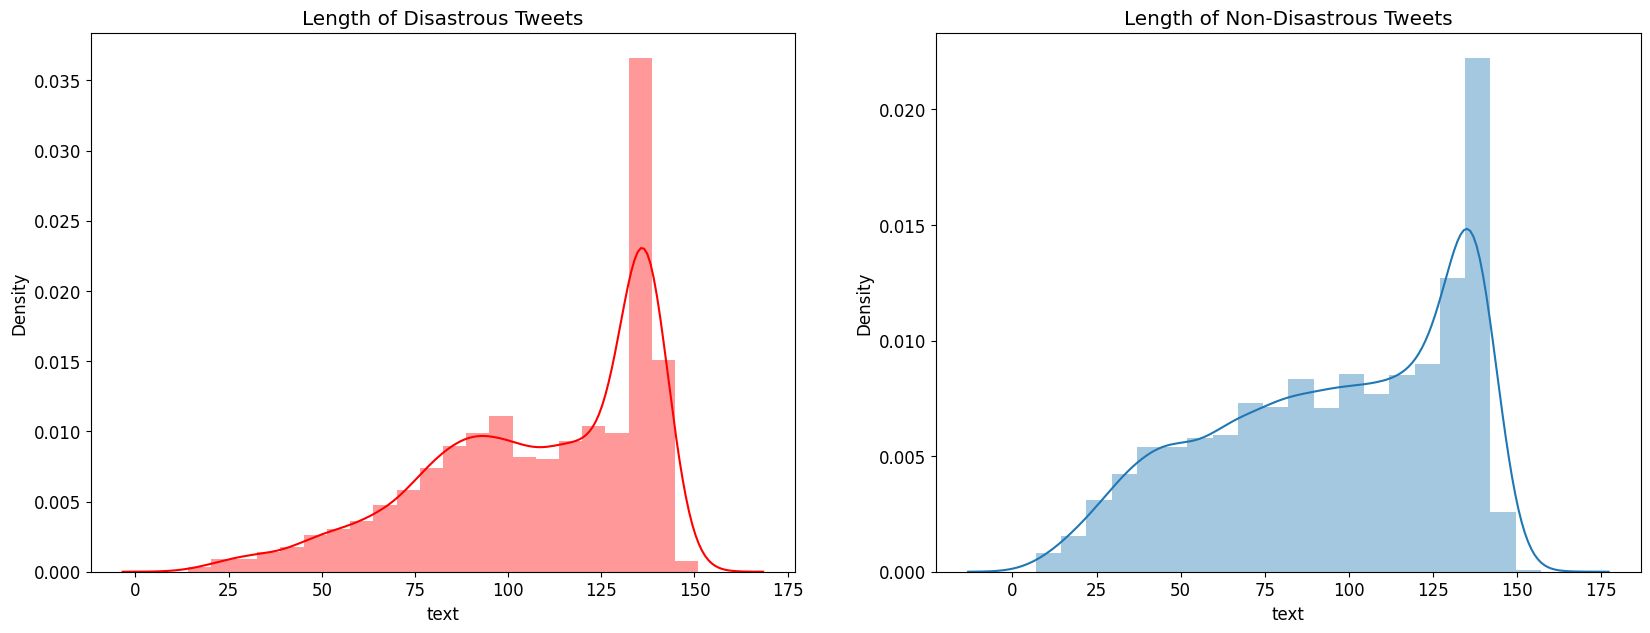

In [20]:
# Tweet Length for both classes

pos_tw_len = df_train[df_train['target'] == 1]['text'].str.len()
neg_tw_len = df_train[df_train['target'] == 0]['text'].str.len()

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Length of Disastrous Tweets')
sns.distplot(pos_tw_len, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Length of Non-Disastrous Tweets')
sns.distplot(neg_tw_len, label='Non-Disaster Tweet length', ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Word Count of Disastrous Tweets')

<Axes: title={'center': 'Word Count of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Word Count of Non-Disastrous Tweets')

<Axes: title={'center': 'Word Count of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

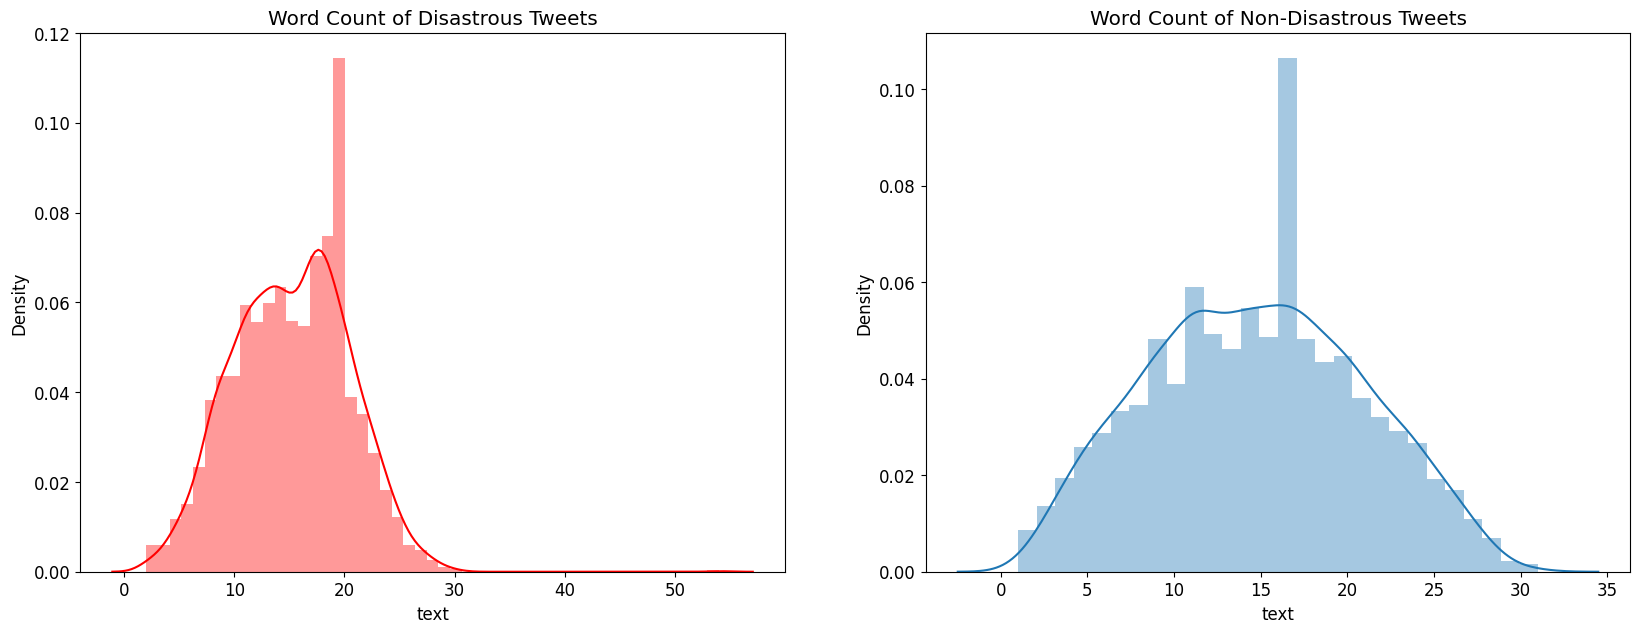

In [21]:
# Word Count of Tweets in both classes
pos_tw_len = df_train[df_train['target'] == 1]['text'].apply(lambda x: len(x.split(' ')))
neg_tw_len = df_train[df_train['target'] == 0]['text'].apply(lambda x: len(x.split(' ')))

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Word Count of Disastrous Tweets')
sns.distplot(pos_tw_len, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Word Count of Non-Disastrous Tweets')
sns.distplot(neg_tw_len, label='Non-Disaster Tweet length', ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Unique Word Count of Disastrous Tweets')

<Axes: title={'center': 'Unique Word Count of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Unique Word Count of Non-Disastrous Tweets')

<Axes: title={'center': 'Unique Word Count of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

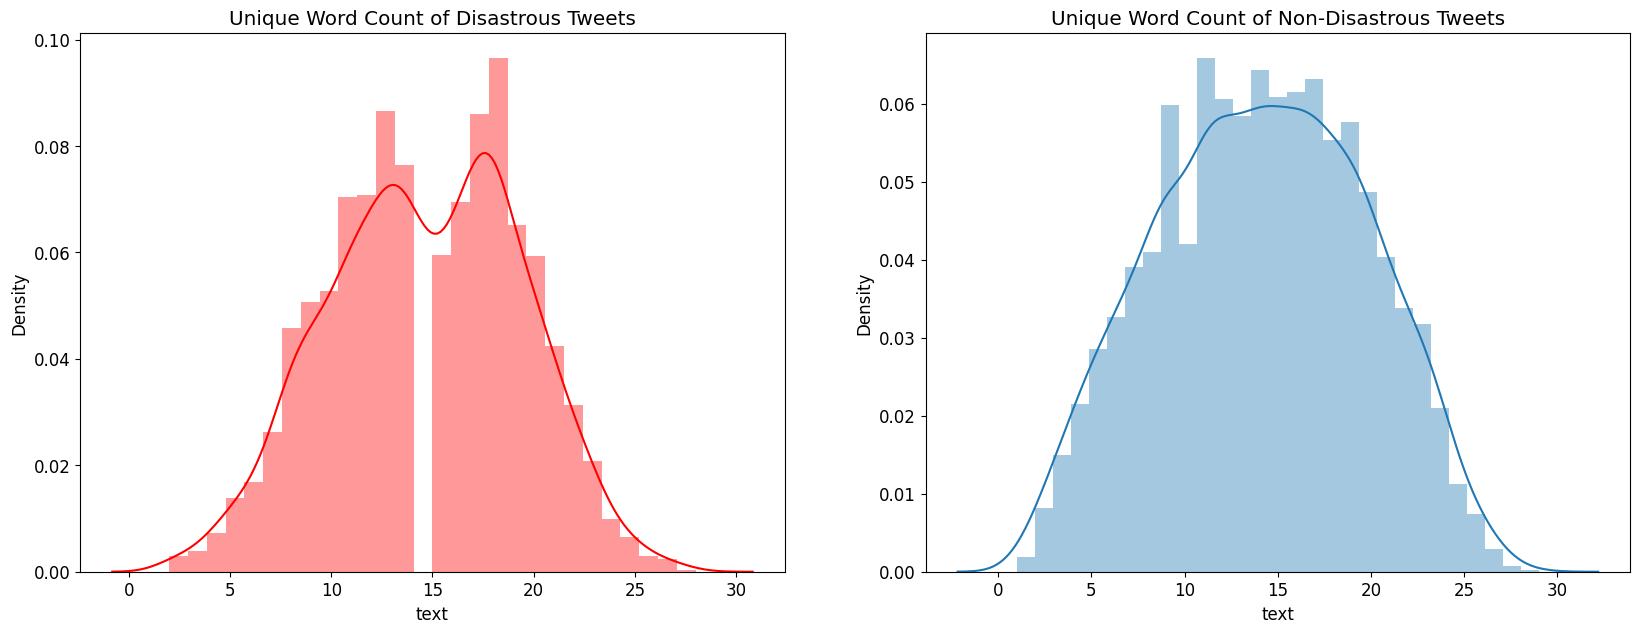

In [22]:
# Number of Unique words in Tweets in both classes
pos_tw_len = df_train[df_train['target'] == 1]['text'].apply(lambda x: len(set(x.split(' '))))
neg_tw_len = df_train[df_train['target'] == 0]['text'].apply(lambda x: len(set(x.split(' '))))

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Unique Word Count of Disastrous Tweets')
sns.distplot(pos_tw_len, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Unique Word Count of Non-Disastrous Tweets')
sns.distplot(neg_tw_len, label='Non-Disaster Tweet length', ax=ax[1])

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Hashtags Count of Disastrous Tweets')

<Axes: title={'center': 'Hashtags Count of Disastrous Tweets'}, xlabel='text', ylabel='Density'>

Text(0.5, 0, ' ')

Text(0.5, 1.0, 'Hashtags Count of Non-Disastrous Tweets')

<Axes: title={'center': 'Hashtags Count of Non-Disastrous Tweets'}, xlabel='text', ylabel='Density'>

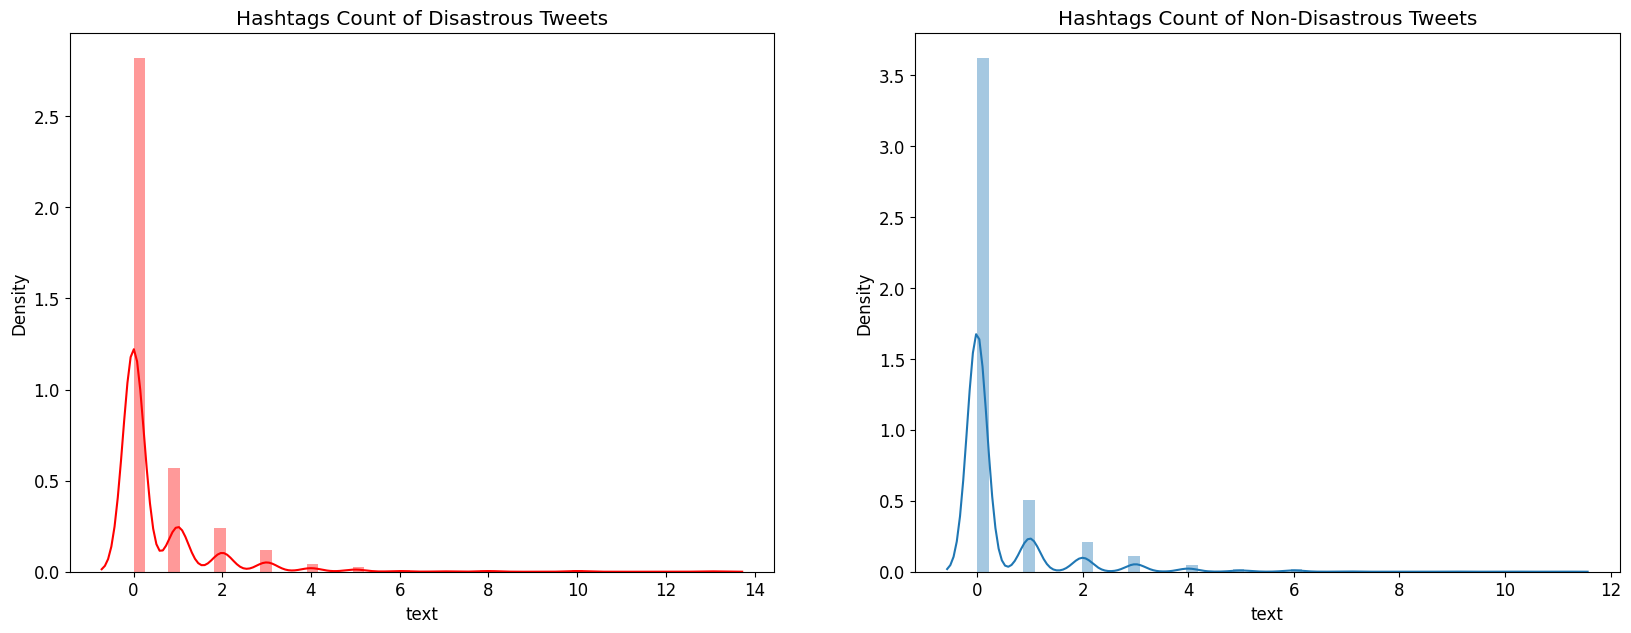

In [23]:
# Number of occurances of # hashtag in a tweet in both classes
pos_tw = df_train[df_train['target'] == 1]['text'].apply(lambda x: x.count('#'))
neg_tw = df_train[df_train['target'] == 0]['text'].apply(lambda x: x.count('#'))

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].set_xlabel(' ')
ax[0].set_title('Hashtags Count of Disastrous Tweets')
sns.distplot(pos_tw, label='Disaster Tweet length', ax=ax[0], color='red')

ax[1].set_xlabel(' ')
ax[1].set_title('Hashtags Count of Non-Disastrous Tweets')
sns.distplot(neg_tw, label='Non-Disaster Tweet length', ax=ax[1])


<Axes: xlabel='count'>

Text(0.5, 1.0, 'Top 20 hastags in disaster tweets')

<Axes: xlabel='count'>

Text(0.5, 1.0, 'Top 20 hastags in non-disaster tweets')

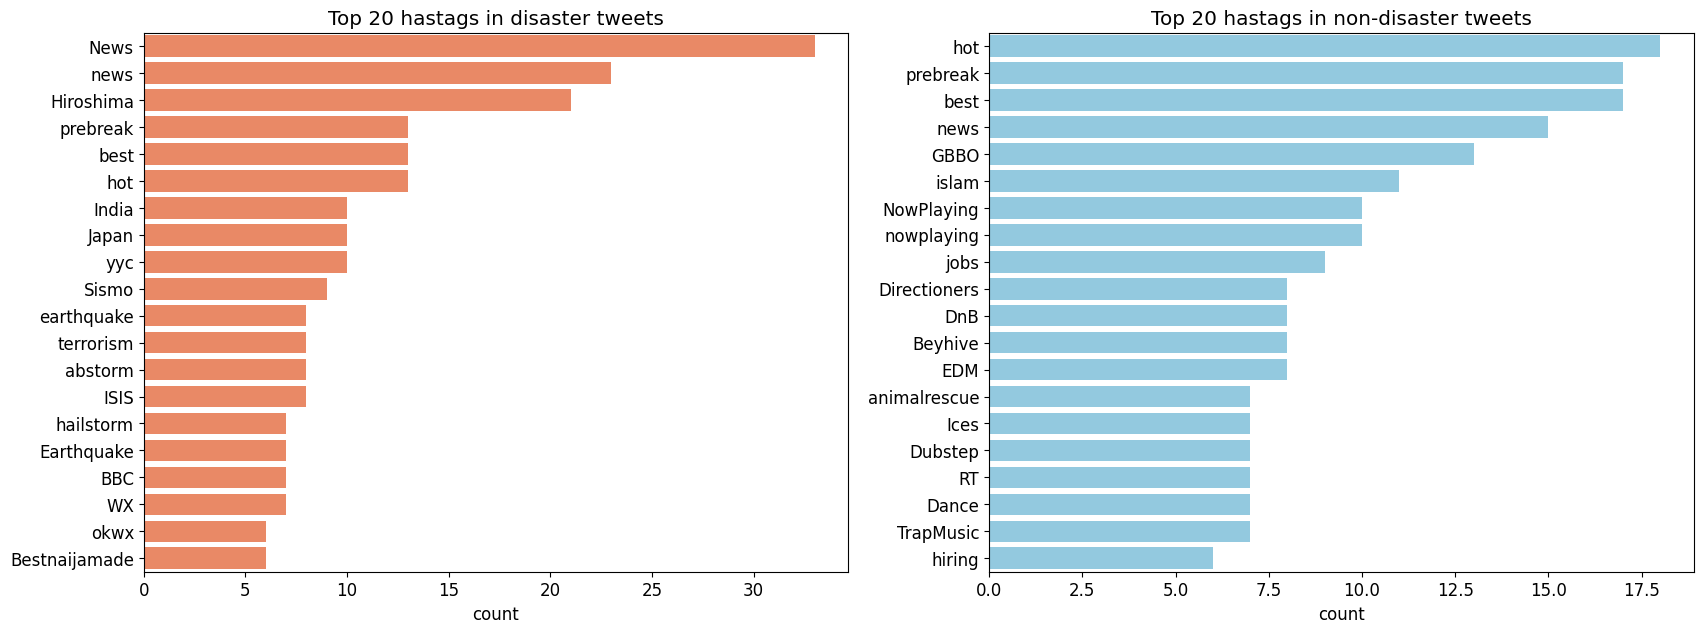

In [24]:
# Top 20 Hastags for each class
def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'None'
df_train['hashtags'] = df_train['text'].apply(lambda x: find_hashtags(x))
df_test['hashtags'] = df_test['text'].apply(lambda x: find_hashtags(x))

fig, ax = plt.subplots(1,2, figsize=(20,7))


freq_d = FreqDist(w for w in word_tokenize(' '.join(df_train.loc[df_train['target']==1, 'hashtags'])) if w != 'None')
df_d = pd.DataFrame.from_dict(freq_d, orient='index', columns=['count'])
hashtag_d = df_d.sort_values('count', ascending=False).head(20)
sns.barplot(x = hashtag_d['count'], y = hashtag_d.index, color='coral', ax = ax[0])
ax[0].set_title('Top 20 hastags in disaster tweets')

freq_nd = FreqDist(w for w in word_tokenize(' '.join(df_train.loc[df_train['target']==0, 'hashtags'])) if w != 'None')
df_nd = pd.DataFrame.from_dict(freq_nd, orient='index', columns=['count'])
hashtag_nd = df_nd.sort_values('count', ascending=False).head(20)
sns.barplot(x = hashtag_nd['count'], y = hashtag_nd.index, ax = ax[1], color='skyblue')
ax[1].set_title('Top 20 hastags in non-disaster tweets')

plt.show()

In [25]:
# df_train[df_train['location'] != 'None']['location'].value_counts().plot(kind='pie')

## Preprocessing

In [26]:
df_train['text'][0:20]

0                                                                     Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1                                                                                                    Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3                                                                         13,000 people receive #wildfires evacuation orders in California 
4                                                  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
5                            #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
6                                           #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
7                   

### Data Cleaning
Need RegExp to clean the text, remove puntuations, remove stop words, and Lemmatize words.

In [27]:
# stop_words = set(list(STOPWORDS) + stopwords.words('english'))

In [4]:
def preprocess(data):
  '''The below preprocessing is performed.
    1. Lower casing
    2. Cleaning with RegExp
    3. Tokenizing
    4. Remove Punctuations
    5. Remove Stopwords
    6. Lemmatize
  '''
  # Converting all the text data to its lower form
  data = data.lower()

  # Cleaning with RegExp
  # Removing URLs from the text data
  data = re.sub(r'https?://\S+|www\.\S+', '', data)
  # Removing HTML Tags
  data = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", '', data)
  #Removing Non-Ascii
  data = re.sub(r'[^\x00-\x7f]','', data)
  # Removing Emojis
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  data = emoji_pattern.sub(r'', data)

  doc = nlp(data)

  # Remove Punctuations
  data = [token for token in doc if token.text not in string.punctuation]

  # Remove stopwords
  data = [token for token in data if not token.is_stop]

  # Lemmatize
  data = ' '.join([token.lemma_ for token in data])

  return data


In [5]:
%%time
df_train['cleaned_text'] = df_train['text'].apply(preprocess)
df_train.head()
df_train.shape

CPU times: total: 14.3 s
Wall time: 44.9 s


(7613, 6)

In [6]:
%%time
df_test['cleaned_text'] = df_test['text'].apply(preprocess)
df_test.head()
df_test.shape

CPU times: total: 6.56 s
Wall time: 17.2 s


(3263, 5)

In [7]:
# Dataset labels

labels = df_train['target']

## Model Building

### Experiment 1
Bag of Words with Array of ML Models

In [32]:
# Bag-of-Words Model
bow = CountVectorizer(dtype=np.float32)
train_bow = bow.fit_transform(df_train['cleaned_text'])

print('Vocabulary Length : ', len(bow.vocabulary_))

Vocabulary Length :  14627


In [33]:
type(labels.values[0])

numpy.int64

In [45]:
# Model Experimentations
# Machine Learning models

model = {'Logistic Regression' : LogisticRegression(random_state=1),
         'Support Vector Machines' : SVC(random_state=1),
         'Multinomial Naive Bayes' : MultinomialNB(),
         'Decision Trees' : DecisionTreeClassifier(random_state=1),
         'Random Forest Classifier' : RandomForestClassifier(random_state=1),
         'lightGBM': LGBMClassifier(random_state=1),
         'CatBoost': CatBoostClassifier(random_state=1),
         'XG Boosting' : XGBClassifier(random_state=1)}


def models_fitting_pipeline(X, Y, models):
    model_score = {}
    for name, model in models.items():
        print("5-Fold Cross-Validation : ", name)

        model_score[name] = np.mean(cross_val_score(model,X, Y,
                                              cv=5,
                                              scoring='accuracy',
                                              verbose=2,
                                              n_jobs=-1))
        
    # Converting model_score to DataFrame
    model_score = {'5-Fold CV Score': model_score}
    model_score_df = pd.DataFrame(model_score)
    model_score_df.rename_axis('Model', inplace=True)
    model_score_df.reset_index(inplace=True)
    model_score_df.sort_values('5-Fold CV Score', ascending=False, inplace=True)
    return model_score_df

In [35]:
%%time
bow_score = models_fitting_pipeline(train_bow, labels, model)
bow_score

5-Fold Cross-Validation :  Logistic Regression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Support Vector Machines


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Multinomial Naive Bayes


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Decision Trees


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Random Forest Classifier


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  lightGBM


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  CatBoost


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   58.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  XG Boosting
CPU times: total: 93.8 ms
Wall time: 2min 6s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


,Model,5-Fold CV Score
5,Support Vector Machines,0.704463
3,Multinomial Naive Bayes,0.690801
2,Logistic Regression,0.688566
7,lightGBM,0.650078
4,Random Forest Classifier,0.644823
6,XG Boosting,0.628404
1,Decision Trees,0.597922
0,CatBoost,NaN


### Experiment 2
TF-IDF Vectorization with Array of ML models

In [8]:
# TF-IDF Model
tfidf = TfidfVectorizer(dtype=np.float32)
train_tfidf = tfidf.fit_transform(df_train['cleaned_text'])
print('Vocabulary Length : ', len(tfidf.vocabulary_))

Vocabulary Length :  14627


In [30]:
df_train['cleaned_text'].shape

(7613,)

In [ ]:
test_tfidf = tfidf.transform(df_test['cleaned_text'])

In [37]:
%%time
tfidf_score = models_fitting_pipeline(train_tfidf, labels, model)
tfidf_score

5-Fold Cross-Validation :  Logistic Regression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Support Vector Machines


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Multinomial Naive Bayes
5-Fold Cross-Validation :  Decision Trees


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Random Forest Classifier


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  lightGBM


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  CatBoost


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  XG Boosting
CPU times: total: 0 ns
Wall time: 2min 54s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


,Model,5-Fold CV Score
3,Multinomial Naive Bayes,0.716807
2,Logistic Regression,0.701309
5,Support Vector Machines,0.698419
4,Random Forest Classifier,0.646270
7,lightGBM,0.645744
0,CatBoost,0.628143
6,XG Boosting,0.628012
1,Decision Trees,0.599108


### Experiment 3
Scaling + Simple Logistic Regreession Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

In [39]:
pipe_lr = make_pipeline(MaxAbsScaler(), LogisticRegression(random_state=1)) 
pipe_svm = make_pipeline(MaxAbsScaler(), SVC(random_state=1))

scaled_models = {'Scaled Logistic Regression': pipe_lr,
         'Scaled SVM': pipe_svm}

scaled_score = models_fitting_pipeline(train_tfidf, labels, scaled_models)
scaled_score


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Scaled Logistic Regression


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


5-Fold Cross-Validation :  Scaled SVM


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


,Model,5-Fold CV Score
1,Scaled SVM,0.698551
0,Scaled Logistic Regression,0.691851


### Experiment 4
Stacking the top 3 performing models with Logistic Regression as final estimator.
- Naive Bayes  \  
- Logistic Reg - Logistic -> Output  
- SVM Classif  /

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(train_tfidf, labels, test_size=0.25, random_state=1)

In [43]:
estimators = [('MNaiveBayes', MultinomialNB()),
                ('LogReg', LogisticRegression(random_state=1)),
                ('SVM', SVC(random_state=1))]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1), cv=5)
clf.fit(X_train, Y_train)


StackingClassifier(cv=5,
                   estimators=[('MNaiveBayes', MultinomialNB()),
                               ('LogReg', LogisticRegression(random_state=1)),
                               ('SVM', SVC(random_state=1))],
                   final_estimator=LogisticRegression(random_state=1))

In [44]:
clf.score(X_test, Y_test)

0.8146008403361344

In [46]:
clf = {'Stack':StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1), cv=5)}
stack_score = models_fitting_pipeline(train_tfidf, labels, clf)
stack_score

5-Fold Cross-Validation :  Stack


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished


,Model,5-Fold CV Score
0,Stack,0.717989


In [11]:
estimators = [('MNaiveBayes', MultinomialNB()),
                ('LogReg', LogisticRegression(random_state=1)),
                ('SVM', SVC(random_state=1))]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1), cv=5)
stack_clf.fit(train_tfidf, labels)

StackingClassifier(cv=5,
                   estimators=[('MNaiveBayes', MultinomialNB()),
                               ('LogReg', LogisticRegression(random_state=1)),
                               ('SVM', SVC(random_state=1))],
                   final_estimator=LogisticRegression(random_state=1))

In [49]:
sub_sample = pd.read_csv("sample_submission.csv")
sub_sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [51]:
# sub_sample['target'] = stack_clf.predict(test_tfidf)
# sub_sample.to_csv('submission_stack.csv', index=False)

## Predict Function for App

In [12]:
# Retraining MultiNB, Logistic and Stacking Classifiers on complete dataset
MNB_full = MultinomialNB().fit(train_tfidf, labels)
LogReg_full = LogisticRegression().fit(train_tfidf, labels)
# Stacking Classifier alreadt trained on full data (stack_clf)

In [18]:
tfidf

TfidfVectorizer(dtype=<class 'numpy.float32'>)

In [19]:
import pickle
# Pickle the models and TFIDF objects
pickle.dump((tfidf, MNB_full, LogReg_full, stack_clf), open('objects.pkl','wb'))

In [20]:
tfidf, mnb, logreg, stack = pickle.load(open('objects.pkl', 'rb'))

# Preprocess using Spacy
def preprocess(data):
  '''The below preprocessing is performed.
    1. Lower casing
    2. Cleaning with RegExp
    3. Tokenizing
    4. Remove Punctuations
    5. Remove Stopwords
    6. Lemmatize
  '''
  # Converting all the text data to its lower form
  data = data.lower()

  # Cleaning with RegExp
  # Removing URLs from the text data
  data = re.sub(r'https?://\S+|www\.\S+', '', data)
  # Removing HTML Tags
  data = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", '', data)
  #Removing Non-Ascii
  data = re.sub(r'[^\x00-\x7f]','', data)
  # Removing Emojis
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  data = emoji_pattern.sub(r'', data)

  doc = nlp(data)

  # Remove Punctuations
  data = [token for token in doc if token.text not in string.punctuation]

  # Remove stopwords
  data = [token for token in data if not token.is_stop]

  # Lemmatize
  data = ' '.join([token.lemma_ for token in data])

  return data


In [21]:
print('Enter new Tweet')
input_text = str(input())

Enter new Tweet


In [22]:
input_text

'Syria and Turkey hit by a massive earthquake today morning due to which many buildings collapsed'

In [24]:
input_cleaned = preprocess(input_text)

In [25]:
input_cleaned

'syria turkey hit massive earthquake today morning building collapse'

In [32]:
# TFIDF vectorizer
input_tokens = tfidf.transform([input_cleaned])

# MultiNB, Stacking, LogReg models predictions
mnb_predict = mnb.predict(input_tokens)
logreg_predict = logreg.predict(input_tokens)
stack_predict = stack.predict(input_tokens)